In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    #df = pd.concat([df,dummies.iloc[:, 1:]],axis=1)
    df = pd.concat([df,dummies],axis=1)
    return df

In [6]:
def data_preprocessing(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    for col in [
        'Age_categories', 
        'Fare_categories', 
        'Title', 
        'Cabin_type', 
        'Sex'
    ]:
        df = create_dummies(df, col)
        
    return df

In [7]:
train = data_preprocessing(train)
holdout = data_preprocessing(holdout)

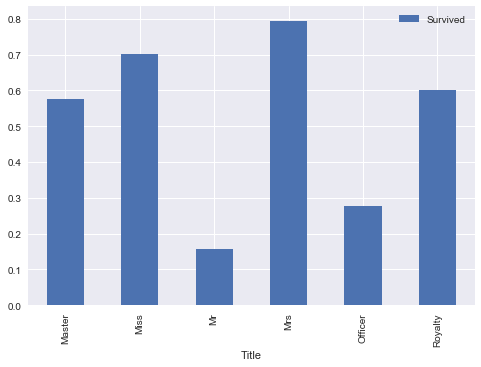

In [172]:
title_pivot = pd.pivot_table(train, values='Survived', index='Title')
title_pivot.plot.bar();

In [29]:
def cabinknown_func(row):
    if row == 'Unknown':
        return 1
    else:
        return 0

train['cabin_known'] = train['Cabin_type'].apply(cabinknown_func)
holdout['cabin_known'] = holdout['Cabin_type'].apply(cabinknown_func)

In [30]:
def is_officer_func(row):
    if row == 'Officer':
        return 1
    else:
        return 0

train['is_officer'] = train['Title'].apply(is_officer_func)
holdout['is_officer'] = holdout['Title'].apply(is_officer_func)

In [31]:
def is_married_woman_func(row):
    if row == 'Mrs':
        return 1
    else:
        return 0

train['is_married_woman'] = train['Title'].apply(is_married_woman_func)
holdout['is_married_woman'] = holdout['Title'].apply(is_married_woman_func)

In [32]:
def is_married_woman_with_children_func(row):
    if row[0] == 'Mrs' and row[1] != 0:
        return 1
    else:
        return 0

train['is_married_woman_with_children'] = train[['Title', 'Parch']].apply(is_married_woman_with_children_func, axis=1)
holdout['is_married_woman_with_children'] = holdout[['Title', 'Parch']].apply(is_married_woman_with_children_func, axis=1)

In [33]:
train[['Title', 'Parch']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
Title    891 non-null object
Parch    891 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


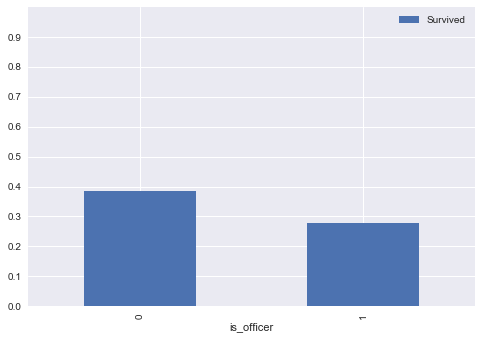

In [171]:
officer_pivot = pd.pivot_table(train, values='Survived', index='is_officer')
officer_pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1));

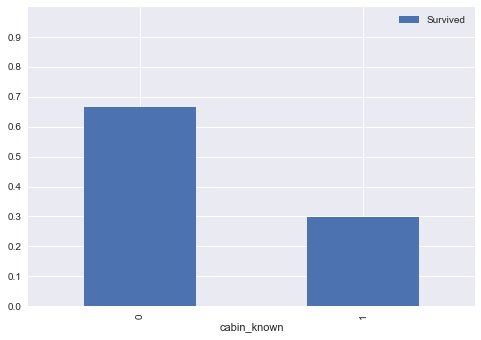

In [170]:
cabin_pivot = pd.pivot_table(train, values='Survived', index='cabin_known')
cabin_pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1));

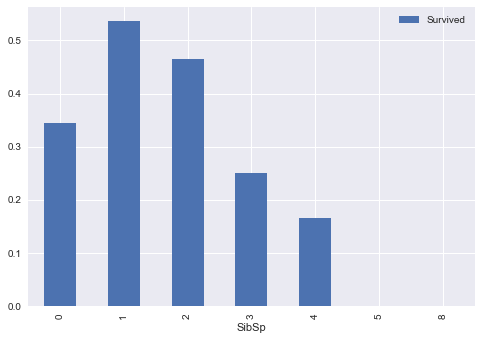

In [168]:
sib_pivot = pd.pivot_table(train, values='Survived', index='SibSp')
sib_pivot.plot.bar();

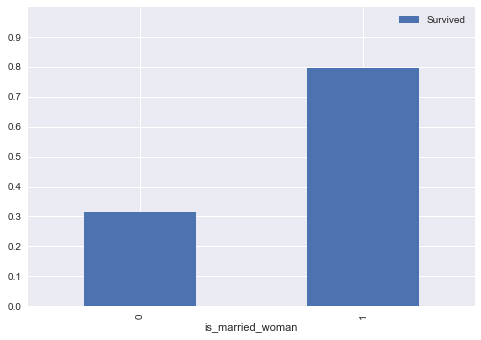

In [167]:
married_woman_pivot = pd.pivot_table(train, values='Survived', index='is_married_woman')
married_woman_pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1));

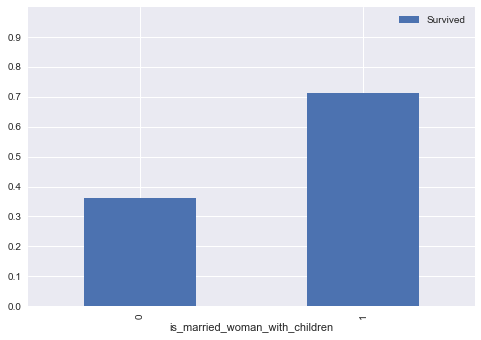

In [166]:
married_woman_with_children_pivot = pd.pivot_table(train, values='Survived', index='is_married_woman_with_children')
married_woman_with_children_pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1));

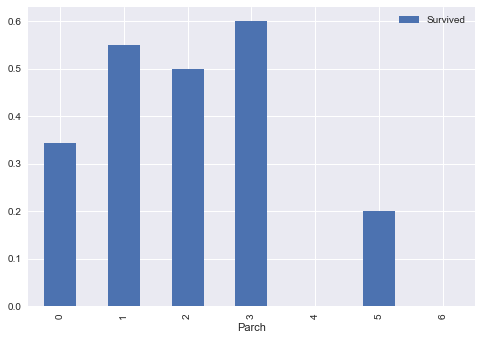

In [165]:
parch_pivot = pd.pivot_table(train, values='Survived', index='Parch')
parch_pivot.plot.bar();

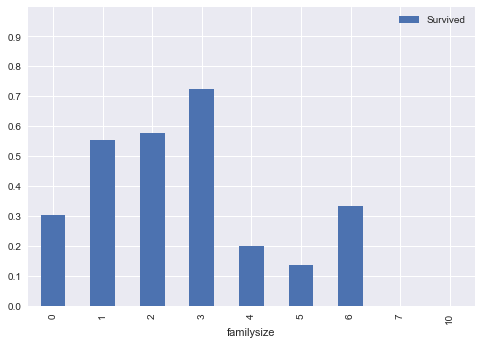

In [163]:
explore_cols = ["SibSp","Parch","Survived"]
explore = train[explore_cols].copy()

explore['familysize'] = explore[["SibSp","Parch"]].sum(axis=1)
pivot = explore.pivot_table(index='familysize', values="Survived")
pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1));

# Findings

## Passengers with no family on board had a survival rate of just 30%

In [41]:
def isalone_func(row):
    if row.sum() == 0:
        return 1
    else:
        return 0

train['isalone'] = train[['SibSp', 'Parch']].apply(isalone_func, axis=1)
holdout['isalone'] = holdout[['SibSp', 'Parch']].apply(isalone_func, axis=1)

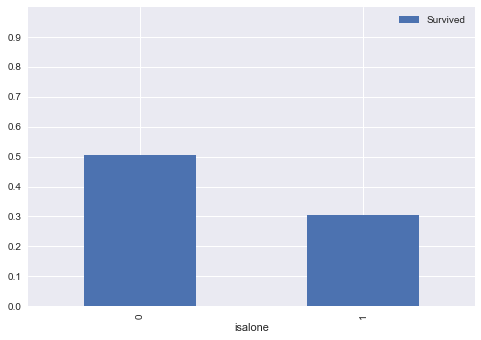

In [162]:
isalone_pivot = pd.pivot_table(train, values='Survived', index='isalone')
isalone_pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1));

In [128]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

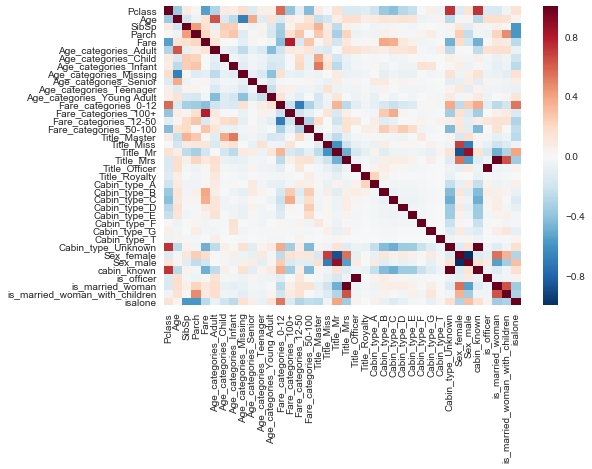

In [161]:
import seaborn as sns
corr = train.drop(['PassengerId', 'Survived'], axis=1).corr()
sns.heatmap(corr);

In [45]:
# Control for collinearity
# train = train.drop(['Pclass', 'Fare','Sex_male'], axis=1)

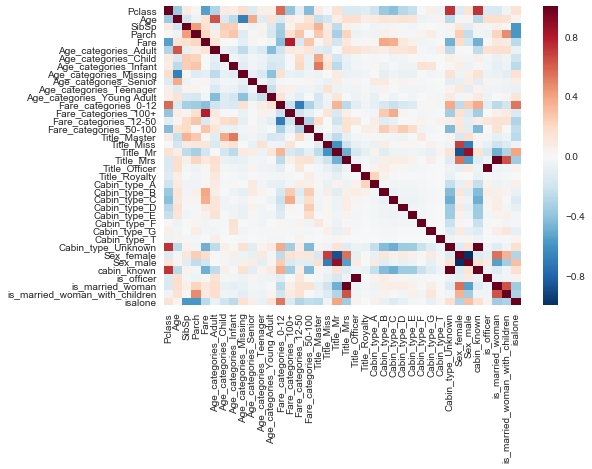

In [160]:
import seaborn as sns
corr = train.drop(['PassengerId', 'Survived'], axis=1).corr()
sns.heatmap(corr);

In [204]:
def select_features(df, target, drop_cols=[], cv=5):
    """Use recursive feature elemination to identify the best features."""
    
    # Exclude any non numeric columns and create X and y dfs.
    df = df.select_dtypes([np.number]).dropna().drop(drop_cols, axis=1)
    X = df.drop(target, axis=1)
    y = df[target]
    
    # RFECV requires a classifier with feature importances such as RandomForest
    clf = RandomForestClassifier() 
    
    # Check average feature importance
    fi_list = []
    for c in range(cv):
        cv_X, _, cv_y, _ = train_test_split(X, y, test_size = 1/cv)
        clf.fit(cv_X, cv_y)
        fi_list.append(clf.feature_importances_)
    
    # Create list of importances standarised by the maximum average value across cv iterations.
    cv_fi = np.mean(fi_list, axis=0)  
    df_fi = pd.DataFrame(cv_fi, index=X.columns, columns=['feat_imp'])/cv_fi.max()
    df_fi = df_fi.sort_values(by='feat_imp', ascending=False)
    
    # Fit RFECV on RandomForest object and pull out best features.
    selector = RFECV(clf, cv=cv)
    selector.fit(X, y)
    best_features = X.columns[selector.support_]
    
    return [best_features, df_fi]

In [207]:
drop_cols = ['PassengerId']
target = 'Survived'
train_features, feat_imp = select_features(train, target, drop_cols=drop_cols)

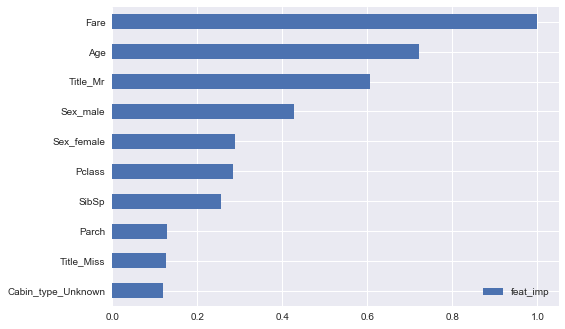

In [216]:
feat_imp.head(10).sort_values(by='feat_imp', ascending=True).plot(kind='barh');

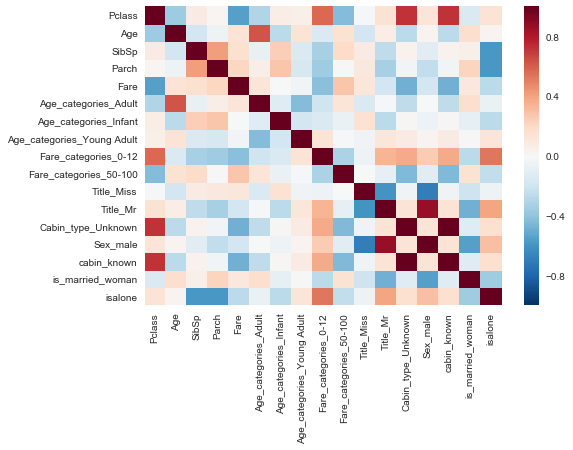

In [158]:
import seaborn as sns
corr = train[train_features].corr()
sns.heatmap(corr);

In [50]:
train_features = train_features.drop(['Cabin_type_Unknown', 'Sex_male'])

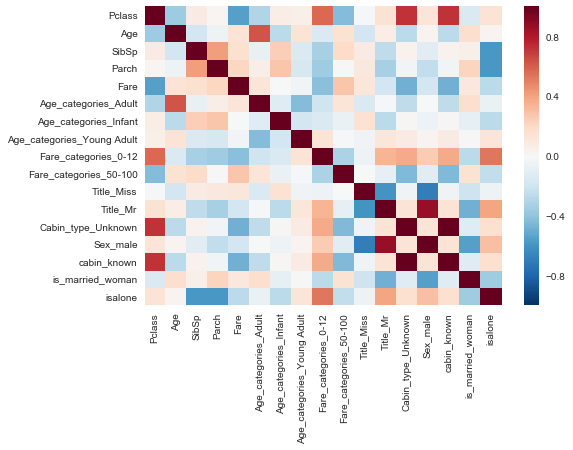

In [159]:
import seaborn as sns
corr = train[train_features].corr()
sns.heatmap(corr);

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import time

In [202]:
def select_model(df, features, target):
    """Performs GridSearch for model_list and selects the best estimator from model list."""
    all_X = df[features]
    all_y = df[target]
    model_list = [
        {
            'name': 'KNeighborsClassifier',
            'estimator': KNeighborsClassifier(),
            'hyperparameters': {
                "n_neighbors": range(1,20,2),
                "weights": ["distance", "uniform"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
                "p": [1,2]
            }
        },        
        {
            'name': 'RandomForestClassifier',
            'estimator': RandomForestClassifier(),
            'hyperparameters': {
                'n_estimators': [15, 18, 21],
                'criterion': ['entropy', 'gini'],
                'max_depth': [15, 18, 21],
                'max_features': ['log2', 'sqrt'],
                'min_samples_leaf': [1, 5, 8],
                'min_samples_split': [8, 12, 15]
            }
        },
        {
            'name': 'LogisticRegression',
            'estimator': LogisticRegression(),
            'hyperparameters': {
                "solver": ["newton-cg", "lbfgs", "liblinear"]
            }
        }
    ]
    
    best_score = -1
    for model in model_list:
        start = time.time()
        print('Model: {}'.format(model['name']))
        grid = GridSearchCV(
            model['estimator'], param_grid=model['hyperparameters']
        )
        grid.fit(all_X, all_y)
        model['best_params'] = grid.best_params_
        model['best_score'] = grid.best_score_
        model['best_estimator'] = grid.best_estimator_
        end = time.time()
        
        print('Score: {}'.format(model['best_score']))
        print('Time: {} seconds'.format(end-start), '\n')
        
        if model['best_score'] > best_score:
            best_score, best_model = model['best_score'], model
    print('Best Model: {}, Best Score: {}.'.format(best_model['name'], best_score)) 
    return best_model

In [203]:
%%time
train_model_selection = select_model(train, train_features, target)

Model: KNeighborsClassifier
Score: 0.7542087542087542
Time: 3.4329354763031006 seconds 

Model: RandomForestClassifier
Score: 0.8327721661054994
Time: 23.257983684539795 seconds 

Model: LogisticRegression
Score: 0.8035914702581369
Time: 0.23606109619140625 seconds 

Best Model: RandomForestClassifier, Best Score: 0.8327721661054994.
Wall time: 26.9 s


In [170]:
def save_submission_file(trained_model, features, file_name='submission.csv'):
    trained_model.fit(train[features], train['Survived'])
    submission_predictions = trained_model.predict(holdout[features])
    
    sub_dict = {
        'PassengerId': holdout['PassengerId'],
        'Survived': submission_predictions
    }
    submission = pd.DataFrame(sub_dict)
    submission.to_csv(file_name, index=False)

In [173]:
trained_model = train_model_selection['best_estimator']
save_submission_file(trained_model, train_features, file_name='Thomas_submission_13.csv')